Importowanie bibliotek i inicjowanie zmiennych globalnych

In [140]:
import imageio as iio
from pathlib import Path
from os import listdir
import os
import numpy as np
from PIL import Image
from skimage.io import imread_collection
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import entropy
import math
seq = imread_collection("C:\\Users\\marce\\Desktop\\trng_walczak_mroz\\*.jpg", conserve_memory=True)
counter = 0
arrayBound = 0
tempArray = []

Funkcja do pozyskiwania bitów z obrazu

In [141]:

def getBits(testImage,innerCounter):
    test = []
    for x in range(0,int(testImage.shape[0]/8)):
        for y in range(0,int(testImage.shape[1]/8)):
            testRgbArray=testImage[x,y]
            R = testRgbArray[0]
            G = testRgbArray[1]
            B = testRgbArray[2]
            if(R>1 and R<254):
                test.append(R&1)
            if(G>1 and G<254):
                test.append(G&1)
            if(B>1 and B<254):
                test.append(B&1)
    if(innerCounter%2 != 0):
        test.reverse()
    innerCounter += 1
    return test

Pozyskanie bitów i dodanie ich do macierzy kwadratowej

In [142]:
for i in seq:
    tab = getBits(i,counter)
    tempArray+=tab

arrayBound = math.floor(np.sqrt(len(tempArray)))
finallArray = np.empty((arrayBound,arrayBound))
actualElement = 0


for i in range(0, arrayBound):
    for j in range(0, arrayBound):
        finallArray[i][j]=tempArray[actualElement]
        actualElement+=1

Transpozycja macierzy

In [143]:
transposedMatrix =np.transpose(finallArray)

Tworzenie histogramu oraz obliczenie entropii

entropia-> 7.998298696818518
liczba wygenerowanych bitow-> 790321


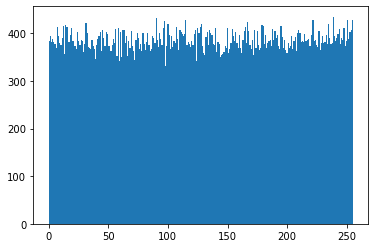

In [144]:
binaryString = ""
for i in range(0,transposedMatrix.shape[0]):
    for j in range(0,transposedMatrix.shape[0]):
        binaryString+=str(math.floor(transposedMatrix[i][j]))

temp = ''
histValues = list()

for i in range(0,len(binaryString)-(len(binaryString)%8),8):
    for j in range(i,i+8):
        temp += binaryString[j]
    x = int(temp,2)
    histValues.append(x)
    temp = ''

plt.hist(histValues,bins=256)

def numberDict(array):
  cnt = Counter()
  for number in array:
    cnt[number] += 1
  return cnt,len(array)  
          
#calc entropy          
def entropy(array):
  dict,len = numberDict(array)
  entropy = 0
  
  for number in dict:
    entropy += -(dict[number]/len) * math.log2(dict[number]/len)
    
  return entropy

print('entropia->',entropy(histValues))
print('liczba wygenerowanych bitow->', len(binaryString))

